In [7]:
pip install --force-reinstall --no-deps numpy==1.26.4'.

/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import re

file_path = '/kaggle/input/friends/friends.csv' 
df = pd.read_csv(file_path, encoding='utf-8')
df = df[df['character'].isin(['Chandler', 'Rachel'])]

df['dialogue'] = df['dialogue'].fillna('').astype(str).apply(lambda x: x.lower())
df['dialogue'] = df['dialogue'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['dialogue'].to_csv('friends_dialogues.txt', index=False, header=False)


Chandler'ın En Sık Kullandığı Kelimeler:
bir: 1656
ve: 1067
bu: 1023
tamam: 909
evet: 741
ne: 691
şey: 587
hayır: 507
mi: 504
ben: 481
çok: 469
ah: 443
ama: 443
o: 434
için: 423
mı: 418
hey: 417
değil: 384
musun: 366
bunu: 350

Rachel'ın En Sık Kullandığı Kelimeler:
bir: 1642
bu: 1188
tamam: 1183
ve: 1154
ne: 948
evet: 934
şey: 870
ah: 841
çok: 643
hayır: 631
ama: 611
o: 500
ben: 490
mi: 479
tanrım: 463
için: 441
musun: 433
aman: 429
yani: 425
değil: 418


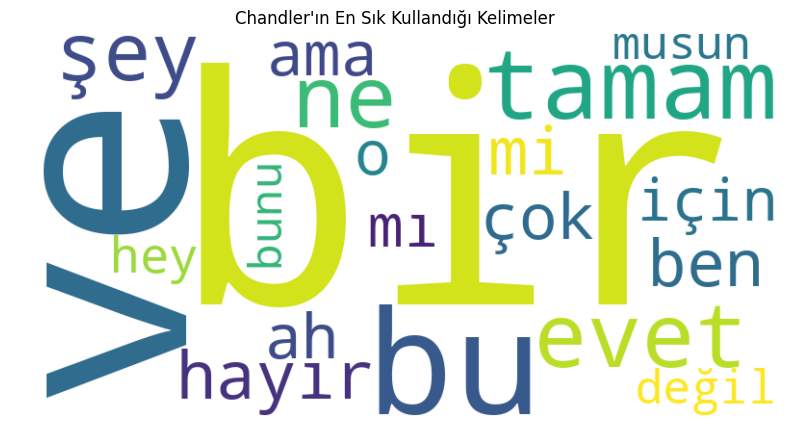

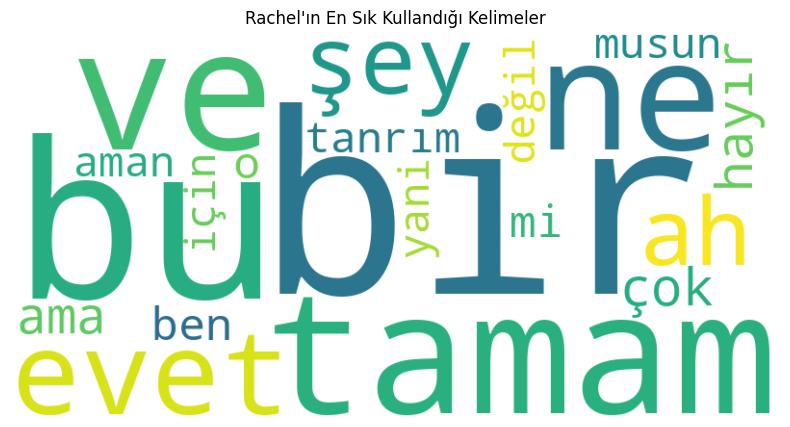

In [4]:
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import os

output_dir = '/kaggle/working/wordclouds/'
os.makedirs(output_dir, exist_ok=True)

def get_most_common_words(dialogues, num_words=20):
    all_words = ' '.join(dialogues).split()
    word_freq = Counter(all_words)
    return word_freq.most_common(num_words)

chandler_dialogues = df[df['character'] == 'Chandler']['dialogue'].tolist()
chandler_common_words = get_most_common_words(chandler_dialogues)
print("Chandler'ın En Sık Kullandığı Kelimeler:")
for word, freq in chandler_common_words:
    print(f"{word}: {freq}")

rachel_dialogues = df[df['character'] == 'Rachel']['dialogue'].tolist()
rachel_common_words = get_most_common_words(rachel_dialogues)
print("\nRachel'ın En Sık Kullandığı Kelimeler:")
for word, freq in rachel_common_words:
    print(f"{word}: {freq}")

def plot_wordcloud(character_name, common_words, filename):
    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{character_name}\'ın En Sık Kullandığı Kelimeler')
    plt.axis('off')
    plt.savefig(os.path.join(output_dir, filename), format='png')
    plt.show()

plot_wordcloud('Chandler', chandler_common_words, 'chandler_wordcloud.png')
plot_wordcloud('Rachel', rachel_common_words, 'rachel_wordcloud.png')
